In [2]:
data <- read.csv("new_chr19_static_classified.csv")
head(data,10)
tail(data,10)

X     binID         start   cata aRead bRead aNorm      bNorm     
1  70654 chr19_3079000 3078900 3    72    119    69.230769  69.186047
2  32181 chr19_3079000 3078900 2    27     48    25.961538  27.906977
3      1 chr19_3079000 3078900 1     5      5     4.807692   2.906977
4  70655 chr19_3079600 3079500 3    58     72    79.452055  67.289720
5  32182 chr19_3079600 3079500 2    10     19    13.698630  17.757009
6      2 chr19_3079600 3079500 1     5     16     6.849315  14.953271
7  70656 chr19_3079800 3079700 3    77    108    53.472222  61.714286
8  32183 chr19_3079800 3079700 2    62     60    43.055555  34.285714
9      3 chr19_3079800 3079700 1     5      7     3.472222   4.000000
10 70657 chr19_3083900 3083800 3     6      8   100.000000 100.000000

X      binID          start    cata aRead bRead aNorm     bNorm    
110058  32179 chr19_61313800 61313700 1     21    54   46.666667 62.790698
110059 110064 chr19_61316600 61316500 3     39    56   75.000000 77.777778
110060  70650 chr19_61316600 61316500 2     13    16   25.000000 22.222222
110061 110065 chr19_61316700 61316600 3    108   196   92.307692 92.018779
110062  70651 chr19_61316700 61316600 2      9    17    7.692308  7.981221
110063 110066 chr19_61324200 61324100 3     79   161   76.699029 77.403846
110064  70652 chr19_61324200 61324100 2     24    47   23.300971 22.596154
110065 110067 chr19_61330000 61329900 3     40    37   64.516129 54.411765
110066  70653 chr19_61330000 61329900 2     17    25   27.419355 36.764706
110067  32180 chr19_61330000 61329900 1      5     6    8.064516  8.823529

In [40]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

binID         start   high medium low
13719 chr19_3079000 3078900  72  27      5 
13722 chr19_3079600 3079500  58  10      5 
13725 chr19_3079800 3079700  77  62      5 
13746 chr19_3083900 3083800   6   0      0 
13751 chr19_3084300 3084200  17  19     47 
13759 chr19_3085800 3085700  16  18      0 
13770 chr19_3087800 3087700  10   0      0 
13814 chr19_3094600 3094500 127  27      7 
13815 chr19_3095100 3095000   9   0      0 
13818 chr19_3095300 3095200  36  16      1

In [53]:
#Stupid Version 1

# clusterdf <- data.frame(bin_ID = c("chr19_3079000"), start = c(3078900), high = c(0), medium = c(0), low = c(0))
# clusterdf

# current.row = 1

# for (row in 1:nrow(data)){

#     if (as.character(data[row,]$binID) == as.character(clusterdf[current.row,]$bin_ID)){
#       clusterdf[current.row, as.numeric(data[row,]$cata) + 2] <- data[row,]$aNorm
#     } else {
#         current.row <- current.row + 1
      
      
#         nextrow <- data.frame(bin_ID = c(as.character(data[row,]$binID)), start = c(data[row,]$start), high = c(0), medium = c(0), low = c(0))

#         clusterdf <- rbind(clusterdf, nextrow)
      
#         clusterdf[current.row, as.numeric(data[row,]$cata) + 2] <- data[row,]$aNorm
#     }

# }

# head(data,10)
# clusterdf

bin_ID        start   high medium low
1 chr19_3079000 3078900 0    0      0

In [41]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [32]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [46]:
pre.row <- clusterdf[1,]

test.fun <- function(row) {
    test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                           as.numeric(as.character(pre.row["medium"])),
                           as.numeric(as.character(pre.row["low"]))),
                         c(as.numeric(as.character(row["high"])), 
                           as.numeric(as.character(row["medium"])),
                           as.numeric(as.character(row["low"]))))
    test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
    value <- chisq.test(test.matrix)$p.value
    pre.row <<- row
    return(c(row["binID"], as.character(row["start"]), as.character(value)))
}

test.result <- apply(clusterdf[-1,], MARGIN = 1, FUN = test.fun)
head(test.result)

Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(te

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test.matrix):
“Chi-squared approximation may b

13722             13725               13746            
binID chr19_3079600     chr19_3079800       chr19_3083900    
       3079500           3079700             3083800         
      0.134512484240761 7.3472590083754e-05 0.080251456994206
      13751                13759                13770             
binID chr19_3084300        chr19_3085800        chr19_3087800     
       3084200              3085700              3087700          
      9.79541544463375e-05 1.02835961928842e-07 0.0086048014593381
      13814             13815             13818            13859             ⋯
binID chr19_3094600     chr19_3095100     chr19_3095300    chr19_3099900     ⋯
       3094500           3095000           3095200          3099800          ⋯
      0.267683771984971 0.304864397756321 0.13687608585125 0.361797590333638 ⋯
      38956             38957             38958            38960              
binID chr19_61309500    chr19_61311200    chr19_61311300   chr19_61312600     
      61309400          61311100          61311200         61312500           
      0.286204357722387 0.855693030966541 0.21111132458434 0.00353972372565971
      38962                38963                38964               
binID chr19_61313200       chr19_61313800       chr19_61316600      
      61313100             61313700             61316500            
      2.58557401307531e-12 0.000154152257657199 1.26943209712261e-08
      38965               38967               38968              
binID chr19_61316700      chr19_61324200      chr19_61330000     
      61316600            61324100            61329900           
      0.00453358963940717 0.00231850032721672 0.00924600991496878

In [ ]:
test.result <- t(test.result)
head(test.result)

In [52]:
test.result <- as.data.frame(test.result)
names(test.result) <- c("binID", "start", "p.value")
head(test.result)

binID         start    p.value             
13722 chr19_3079600  3079500 0.134512484240761   
13725 chr19_3079800  3079700 7.3472590083754e-05 
13746 chr19_3083900  3083800 0.080251456994206   
13751 chr19_3084300  3084200 9.79541544463375e-05
13759 chr19_3085800  3085700 1.02835961928842e-07
13770 chr19_3087800  3087700 0.0086048014593381

In [56]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

binID         start    p.value          
13722 chr19_3079600  3079500 0.134512484240761
13746 chr19_3083900  3083800 0.080251456994206
13814 chr19_3094600  3094500 0.267683771984971
13815 chr19_3095100  3095000 0.304864397756321
13818 chr19_3095300  3095200 0.13687608585125 
13859 chr19_3099900  3099800 0.361797590333638

In [67]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["p.value"], dist = dist)) 
}

dist.result <- t(apply(good.result, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 20)

binID         start    p.value            dist 
13722 chr19_3079600  3079500 0.134512484240761  600  
13746 chr19_3083900  3083800 0.080251456994206  4300 
13814 chr19_3094600  3094500 0.267683771984971  10700
13815 chr19_3095100  3095000 0.304864397756321  500  
13818 chr19_3095300  3095200 0.13687608585125   200  
13859 chr19_3099900  3099800 0.361797590333638  4600 
13861 chr19_3100300  3100200 0.0775351567869552 400  
13872 chr19_3101600  3101500 0.0608660692702607 1300 
13883 chr19_3102500  3102400 0.730318918075466  900  
13904 chr19_3105100  3105000 0.258823577158997  2600 
13941 chr19_3108800  3108700 0.0963845958110645 3700 
13954 chr19_3110800  3110700 0.559045503258047  2000 
14025 chr19_3119800  3119700 0.416885213016173  9000 
14026 chr19_3119900  3119800 0.195577267676745  100  
14054 chr19_3125900  3125800 0.205550896242026  6000 
14074 chr19_3129200  3129100 0.093397700099274  3300 
14078 chr19_3130100  3130000 0.662452388962635  900  
14118 chr19_3136600  3136500 0.417892850477162  6500 
14143 chr19_3139900  3139800 0.601218291548361  3300 
14153 chr19_3141800  3141700 0.124728249104017  1900

In [68]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

binID         start    p.value           dist
14026 chr19_3119900  3119800 0.195577267676745 100 
14205 chr19_3150000  3149900 0.265040629709166 100 
14941 chr19_3247300  3247200 0.999999999999999 100 
14946 chr19_3247900  3247800 0.217642141839937 100 
15164 chr19_3273500  3273400 0.510155138928849 100 
15297 chr19_3287600  3287500 0.47265415211726  100

In [69]:
nrow(dist.result)

[1] 977

In [81]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]  3119700  3119800  3149800  3149900  3247100  3247200  3247700  3247800
   [9]  3273300  3273400  3287400  3287500  3460400  3460500  3470900  3471000
  [17]  3482600  3482700  3527100  3527200  3610100  3610200  3622500  3622600
  [25]  3622700  3630900  3631000  3659400  3659500  3679000  3679100  3715500
  [33]  3715600  3806700  3806800  3809100  3809200  3818200  3818300  3824200
  [41]  3824300  4268900  4269000  4287000  4287100  4398500  4398600  4529800
  [49]  4529900  4602900  4603000  4720300  4720400  4792600  4792700  4818800
  [57]  4818900  4820000  4820100  4878400  4878500  4883500  4883600  4889800
  [65]  4889900  4932600  4932700  4945200  4945300  5031400  5031500  5039600
  [73]  5039700  5130900  5131000  5165700  5165800  5316300  5316400  5316500
  [81]  5316800  5316900  5317000  5317500  5317600  5370300  5370400  5381100
  [89]  5381200  5498500  5498600  5643800  5643900  5663700  5663800  5673200
  [97]  5673300  5760700  5760800  5803100  5803200  5830100  5830200  5846200
 [105]  5846300  5984200  5984300  6008700  6008800  6014200  6014300  6070700
 [113]  6070800  6081300  6081400  6945200  6945300  6980700  6980800  6994100
 [121]  6994200  7014800  7014900  7040600  7040700  7533200  7533300  7658500
 [129]  7658600  7774200  7774300  7777600  7777700  7824000  7824100  7837100
 [137]  7837200  7875400  7875500  7993200  7993300  8010600  8010700  8039800
 [145]  8039900  8247600  8247700  8249700  8249800  8256800  8256900  8282700
 [153]  8282800  8313600  8313700  8318200  8318300  8439000  8439100  8512800
 [161]  8512900  8652500  8652600  8747800  8747900  8870000  8870100  8904200
 [169]  8904300  9157400  9157500  9212200  9212300  9263000  9263100  9274300
 [177]  9274400  9367600  9367700  9389200  9389300  9480800  9480900  9482600
 [185]  9482700  9504400  9504500  9549800  9549900  9550000  9550100  9550400
 [193]  9550500  9550600  9550700  9626300  9626400  9627300  9627400  9660800
 [201]  9660900  9662000  9662100  9662300  9662400  9662700  9662800  9672300
 [209]  9672400  9754200  9754300  9754400  9754500  9759300  9759400  9877100
 [217]  9877200 10015100 10015200 10018400 10018500 10027400 10027500 10077600
 [225] 10077700 10192000 10192100 10587200 10587300 10847100 10847200 10895400
 [233] 10895500 10906700 10906800 10906900 11038800 11038900 11272700 11272800
 [241] 11281100 11281200 11288300 11288400 11423700 11423800 11425100 11425200
 [249] 11425300 11430300 11430400 11440500 11440600 11459100 11459200 11688700
 [257] 11688800 11731800 11731900 11734000 11734100 11809600 11809700 11877400
 [265] 11877500 11877600 11912000 11912100 12002900 12003000 12006000 12006100
 [273] 12238400 12238500 12273400 12273500 12365000 12365100 12366700 12366800
 [281] 12543800 12543900 12778900 12779000 13038900 13039000 13040700 13040800
 [289] 13040900 13044000 13044100 13045600 13045700 13048400 13048500 13048600
 [297] 13119900 13120000 13120100 13120600 13120700 13138800 13138900 13143000
 [305] 13143100 13270000 13270100 13360600 13360700 13609900 13610000 13610100
 [313] 13610700 13610800 13919200 13919300 13926200 13926300 13926400 13928900
 [321] 13929000 13929700 13929800 13930100 13930200 13932500 13932600 13947800
 [329] 13947900 13980600 13980700 14020400 14020500 14021000 14021100 14197100
 [337] 14197200 14267500 14267600 14267700 14267800 14405000 14405100 14473900
 [345] 14474000 14540100 14540200 14577400 14577500 14746300 14746400 14798100
 [353] 14798200 14950600 14950700 14950800 15109000 15109100 15109700 15109800
 [361] 15136800 15136900 15193900 15194000 15434800 15434900 15475500 15475600
 [369] 15554900 15555000 15685100 15685200 15711800 15711900 15788900 15789000
 [377] 15841600 15841700 15868200 15868300 15955400 15955500 15978800 15978900
 [385] 16050400 16050500 16082500 16082600 16173400 16173500 16267500 16267600
 [393] 16278600 16278700 16436000 16436100 16490200 16490300 16616600 16616700
 [401] 16672600 16672700 16686400 16686500 16721300 1

In [82]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
head(grouping,10)

binID         start   high medium low
14025 chr19_3119800 3119700 138  23     8  
14026 chr19_3119900 3119800  74  22     6  
14203 chr19_3149900 3149800  30   0     0  
14205 chr19_3150000 3149900  43   4     0  
14939 chr19_3247200 3247100  37   1     0  
14941 chr19_3247300 3247200  17   0     0  
14945 chr19_3247800 3247700  17   6     0  
14946 chr19_3247900 3247800  74  12     4  
15162 chr19_3273400 3273300 116  28     1  
15164 chr19_3273500 3273400 146  38     0

In [99]:
# Stupid Version 1

# current.start = as.numeric(clusterdf[1,]$start)
# current.start.row = 1
# current.group <- c(1)

# result <- c()
# #result.index <- 1

# for (i in 2:nrow(clusterdf)){
#     cand <- as.numeric(clusterdf[i,]$start)
# #     diff <- abs(clusterdf[current.start.row,]$high - clusterdf[i,]$high) + abs(clusterdf[current.start.row,]$medium - clusterdf[i,]$medium) + abs(clusterdf[current.start.row,]$low - clusterdf[i,]$low)
#     test_matrix <- cbind(c(clusterdf[current.start.row,]$high, clusterdf[current.start.row,]$medium, clusterdf[current.start.row,]$low),
#                 c(clusterdf[i,]$high, clusterdf[i,]$medium, clusterdf[i,]$low))
#     test_matrix <- test_matrix[rowSums(test_matrix) > 0, ]
#     p_value <- chisq.test(test_matrix)$p.value
    
#     if ((cand - current.start) > dist_tolerance){
#         if (length(current.group) > 1){
#             current.group <- c(current.group, -1)
#             #result[[result.index]] <- current.group
#             result <- append(result, current.group)
#             #result.index <- result.index + 1
#         }
#         current.start <- cand
#         current.start.row <- i
#         current.group <- c(i)
#     } else if (p_value > alpha){
#         current.group <- append(current.group, i)
#         current.start <- cand
#         current.start.row <- i
#     } else {
#         if (length(current.group) > 1){
#             current.group <- c(current.group, -2)
#             result <- append(result, current.group)
#         }
#         current.start <- cand
#         current.start.row <- i
#         current.group <- c(i)
#     }
# }

# if (i == nrow(clusterdf) && (length(current.group) > 1)){
#     result <- append(result, current.group)
#     #result[[result.index]] <- current.group
# }

# result

Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(te

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(test_matrix):
“Chi-squared approximation may b

[1]    22    23    -1    80    81    -1    87    88    -1    97    98    -1
  [13]   126   127    -1   137   138    -1   142   143    -1   149   150    -1
  [25]   171   172    -1   175   176    -1   180   181    -1   184   185   186
  [37]    -1   260   261    -1   288   289    -1   297   298    -1   308   309
  [49]    -1   311   312    -1   332   333   334    -1   336   337    -1   343
  [61]   344    -1   346   347    -1   358   359    -2   380   381    -1   382
  [73]   383    -2   402   403   404    -1   414   415    -1   416   417    -1
  [85]   425   426   427    -1   432   433    -2   440   441    -1   449   450
  [97]    -1   453   454    -1   459   460    -1   467   468    -1   500   501
 [109]    -1   509   510    -1   521   522    -1   543   544    -1   553   554
 [121]    -1   556   557   558    -1   566   567    -1   571   572    -1   573
 [133]   574    -1   576   577    -1   578   579    -1   596   597    -1   704
 [145]   705    -1   707   708    -1   722   723    -2   724   725   726    -2
 [157]   746   747   748    -1   760   761    -1   763   764    -1   790   791
 [169]    -1   795   796    -1   829   830    -1   884   885    -1   894   895
 [181]    -1   925   926    -1   927   928    -2   932   933    -1   938   939
 [193]    -2   953   954    -1   968   969    -1   978   979    -1   997   998
 [205]    -1  1024  1025    -1  1035  1036    -1  1043  1044    -2  1045  1046
 [217]    -1  1060  1061    -2  1075  1076    -1  1104  1105    -1  1124  1125
 [229]  1126    -1  1142  1143    -1  1145  1146    -1  1161  1162    -1  1187
 [241]  1188  1189    -1  1196  1197    -1  1202  1203    -2  1212  1213    -1
 [253]  1216  1217    -1  1222  1223    -1  1225  1226    -1  1232  1233    -1
 [265]  1243  1244    -1  1253  1254    -1  1268  1269    -1  1270  1271    -1
 [277]  1275  1276    -1  1277  1278    -1  1294  1295    -1  1324  1325    -1
 [289]  1326  1327    -2  1334  1335    -1  1346  1347  1348    -1  1353  1354
 [301]    -1  1426  1427    -1  1442  1443    -1  1451  1452    -1  1462  1463
 [313]    -1  1474  1475    -1  1490  1491    -1  1494  1495    -1  1504  1505
 [325]    -1  1507  1508    -1  1525  1526  1527    -1  1535  1536    -1  1546
 [337]  1547  1548    -2  1555  1556    -1  1571  1572    -1  1597  1598    -1
 [349]  1602  1603    -1  1614  1615    -1  1658  1659    -1  1665  1666    -2
 [361]  1676  1677    -1  1684  1685    -1  1725  1726  1727    -1  1729  1730
 [373]    -1  1735  1736  1737    -1  1742  1743    -1  1746  1747    -1  1754
 [385]  1755    -1  1770  1771    -1  1772  1773    -1  1781  1782    -1  1784
 [397]  1785    -2  1803  1804    -2  1806  1807    -2  1821  1822    -2  1863
 [409]  1864    -1  1886  1887    -1  1898  1899    -1  1901  1902    -2  1911
 [421]  1912    -2  1919  1920    -1  1929  1930    -1  1934  1935    -1  1942
 [433]  1943    -2  1957  1958    -1  1961  1962    -1  2014  2015    -2  2034
 [445]  2035    -1  2078  2079  2080  2081    -1  2082  2083    -1  2101  2102
 [457]    -1  2121  2122    -1  2126  2127    -1  2128  2129    -1  2131  2132
 [469]    -1  2135  2136    -1  2153  2154    -1  2159  2160    -1  2175  2176
 [481]    -1  2193  2194    -1  2217  2218    -1  2235  2236    -1  2239  2240
 [493]    -1  2242  2243  2244    -1  2251  2252    -1  2269  2270    -1  2280
 [505]  2281    -1  2282  2283    -1  2291  2292    -1  2336  2337    -2  2339
 [517]  2340    -2  2345  2346    -1  2351  2352    -1  2354  2355    -1  2359
 [529]  2360    -1  2364  2365    -1  2389  2390    -1  2397  2398    -1  2406
 [541]  2407    -1  2417  2418    -1  2432  2433    -1  2448  2449    -1  2457
 [553]  2458    -1  2534  2535  2536    -1  2557  2558    -1  2595  2596    -1
 [565]  2606  2607    -1  2613  2614    -1  2616  2617    -1  2635  2636    -1
 [577]  2647  2648    -1  2652  2653    -2  2666  2667    -1  2670  2671    -1
 [589]  2672  2673    -1  2693  2694    -1  2706  2707    -2  2715  2716    -1
 [601]  2722  2723    -2  2794  2795    -1  2833  283

In [60]:
# # Distribution
# nogapResult <- result[result != 1]
# nogapResult

[1]    22    23    80    81    87    88    97    98   126   127   137   138
  [13]   142   143   149   150   171   172   175   176   180   181   184   185
  [25]   186   260   261   288   289   297   298   308   309   311   312   332
  [37]   333   334   336   337   343   344   346   347   358   359   380   381
  [49]   382   383   402   403   404   414   415   416   417   425   426   427
  [61]   432   433   440   441   449   450   453   454   467   468   500   501
  [73]   509   510   521   522   543   544   553   554   556   557   558   566
  [85]   567   573   574   576   577   578   579   596   597   704   705   707
  [97]   708   725   726   746   747   748   760   761   763   764   790   791
 [109]   795   796   829   830   884   885   894   895   925   926   927   928
 [121]   932   933   938   939   953   954   978   979   997   998  1024  1025
 [133]  1035  1036  1043  1044  1060  1061  1075  1076  1104  1105  1124  1125
 [145]  1126  1142  1143  1145  1146  1161  1162  1187  1188  1189  1196  1197
 [157]  1202  1203  1212  1213  1216  1217  1222  1223  1225  1226  1232  1233
 [169]  1243  1244  1253  1254  1268  1269  1270  1271  1277  1278  1324  1325
 [181]  1326  1327  1334  1335  1346  1347  1348  1353  1354  1426  1427  1442
 [193]  1443  1451  1452  1462  1463  1474  1475  1490  1491  1494  1495  1504
 [205]  1505  1507  1508  1525  1526  1527  1535  1536  1546  1547  1548  1555
 [217]  1556  1571  1572  1597  1598  1602  1603  1614  1615  1658  1659  1665
 [229]  1666  1676  1677  1725  1726  1727  1729  1730  1735  1736  1737  1746
 [241]  1747  1770  1771  1772  1773  1781  1782  1784  1785  1803  1804  1806
 [253]  1807  1821  1822  1863  1864  1886  1887  1898  1899  1901  1902  1911
 [265]  1912  1919  1920  1929  1930  1934  1935  1942  1943  1957  1958  1961
 [277]  1962  2014  2015  2034  2035  2078  2079  2080  2081  2082  2083  2101
 [289]  2102  2121  2122  2126  2127  2128  2129  2131  2132  2135  2136  2159
 [301]  2160  2175  2176  2193  2194  2217  2218  2235  2236  2242  2243  2244
 [313]  2251  2252  2269  2270  2280  2281  2282  2283  2291  2292  2336  2337
 [325]  2339  2340  2345  2346  2351  2352  2354  2355  2359  2360  2364  2365
 [337]  2389  2390  2397  2398  2406  2407  2417  2418  2432  2433  2448  2449
 [349]  2457  2458  2534  2535  2536  2557  2558  2595  2596  2606  2607  2613
 [361]  2614  2635  2636  2647  2648  2652  2653  2666  2667  2672  2673  2693
 [373]  2694  2706  2707  2715  2716  2722  2723  2794  2795  2833  2834  2854
 [385]  2855  2874  2875  2878  2879  2951  2952  3020  3021  3081  3082  3112
 [397]  3113  3167  3168  3170  3171  3189  3190  3213  3214  3268  3269  3289
 [409]  3290  3319  3320  3324  3325  3334  3335  3363  3364  3383  3384  3458
 [421]  3459  3468  3469  3487  3488  3495  3496  3501  3502  3508  3509  3510
 [433]  3562  3563  3587  3588  3599  3600  3631  3632  3667  3668  3688  3689
 [445]  3717  3718  3722  3723  3732  3733  3779  3780  3800  3801  3874  3875
 [457]  3893  3894  3902  3903  3904  3905  3930  3931  3991  3992  4002  4003
 [469]  4032  4033  4050  4051  4053  4054  4077  4078  4120  4121  4135  4136
 [481]  4171  4172  4217  4218  4222  4223  4240  4241  4250  4251  4271  4272
 [493]  4273  4274  4275  4276  4321  4322  4324  4325  4327  4328  4333  4334
 [505]  4346  4347  4348  4355  4356  4361  4362  4382  4383  4407  4408  4427
 [517]  4428  4462  4463  4478  4479  4483  4484  4501  4502  4503  4504  4505
 [529]  4515  4516  4567  4568  4590  4591  4601  4602  4612  4613  4627  4628
 [541]  4629  4630  4653  4654  4696  4697  4700  4701  4708  4709  4714  4715
 [553]  4721  4722  4751  4752  4765  4766  4772  4773  4794  4795  4796  4797
 [565]  4834  4835  4868  4869  4924  4925  4933  4934  4935  4936  4948  4949
 [577]  4973  4974  5007  5008  5017  5018  5019  5020  5021  5030  5031  5042
 [589]  5043  5052  5053  5066  5067  5071  5072  5073  5076  5077  5091  5092
 [601]  5097  5098  5120  5121  5132  5133  5136  513

In [14]:
# originaldata <- read.csv("chr19.csv", col.names = c("bin_id","chr","start","end","input_label","cpg_number","class_label","methylation","read_number","cpg_pattern","A","B","A_norm",
#                                            "B_norm","delta","A_sum","B_sum","p_val","p_adj"))

# originaldata <- originaldata[order(originaldata$bin_id, originaldata$methylation),]

# originaldata

# clusterReadNumdf <- data.frame(bin_ID = c("chr19_10000700"), readNum = c(0))

# current.row = 1

# for (row in 1:nrow(originaldata)){

#     if (as.character(originaldata[row,]$bin_id) == as.character(clusterReadNumdf[current.row,]$bin_ID)){
#       clusterReadNumdf[current.row, "readNum"] <- clusterReadNumdf[current.row, "readNum"] + as.numeric(originaldata[row, "read_number"])
#     } else {
#         current.row <- current.row + 1
      
#         nextrow <- data.frame(bin_ID = c(as.character(originaldata[row,]$bin_id)), readNum = c(0))

#         clusterReadNumdf <- rbind(clusterReadNumdf, nextrow)
      
#         clusterReadNumdf[current.row, "readNum"] <- as.numeric(originaldata[row,"read_number"])
#     }

# }

# head(originaldata,10)
# clusterReadNumdf

# allReadNum <- clusterReadNumdf[,"readNum"]
# allReadNum

# hist(allReadNum)

# dist.of.reads <- clusterReadNumdf[nogapResult, "readNum"]

# hist(dist.of.reads)

bin_id         chr   start    end      input_label cpg_number class_label
22054 chr19_10000700 chr19 10000600 10000700 AB          2          0          
22055 chr19_10000700 chr19 10000600 10000700 AB          2          1          
22056 chr19_10000700 chr19 10000600 10000700 AB          2          3          
22063 chr19_10001300 chr19 10001200 10001300 AB          3          6          
22061 chr19_10001300 chr19 10001200 10001300 AB          3          4          
22062 chr19_10001300 chr19 10001200 10001300 AB          3          5          
22057 chr19_10001300 chr19 10001200 10001300 AB          3          0          
22059 chr19_10001300 chr19 10001200 10001300 AB          3          2          
22060 chr19_10001300 chr19 10001200 10001300 AB          3          3          
22058 chr19_10001300 chr19 10001200 10001300 AB          3          1          
22067 chr19_10005900 chr19 10005800 10005900 AB          2          3          
22065 chr19_10005900 chr19 10005800 10005900 AB          2          1          
22066 chr19_10005900 chr19 10005800 10005900 AB          2          2          
22064 chr19_10005900 chr19 10005800 10005900 AB          2          0          
22069 chr19_10009400 chr19 10009300 10009400 AB          2          1          
22070 chr19_10009400 chr19 10009300 10009400 AB          2          2          
22071 chr19_10009400 chr19 10009300 10009400 AB          2          3          
22068 chr19_10009400 chr19 10009300 10009400 AB          2          0          
22075 chr19_10010400 chr19 10010300 10010400 AB          2          3          
22072 chr19_10010400 chr19 10010300 10010400 AB          2          0          
22074 chr19_10010400 chr19 10010300 10010400 AB          2          2          
22073 chr19_10010400 chr19 10010300 10010400 AB          2          1          
22079 chr19_10010800 chr19 10010700 10010800 AB          2          3          
22077 chr19_10010800 chr19 10010700 10010800 AB          2          1          
22078 chr19_10010800 chr19 10010700 10010800 AB          2          2          
22076 chr19_10010800 chr19 10010700 10010800 AB          2          0          
22082 chr19_10012700 chr19 10012600 10012700 AB          2          2          
22080 chr19_10012700 chr19 10012600 10012700 AB          2          0          
22081 chr19_10012700 chr19 10012600 10012700 AB          2          1          
22083 chr19_10012700 chr19 10012600 10012700 AB          2          3          
...   ...            ...   ...      ...      ...         ...        ...        
22024 chr19_9993500  chr19 9993400  9993500  AB          2           2         
22025 chr19_9993500  chr19 9993400  9993500  AB          2           3         
22026 chr19_9994600  chr19 9994500  9994600  AB          2           0         
22028 chr19_9994600  chr19 9994500  9994600  AB          2           2         
22029 chr19_9994600  chr19 9994500  9994600  AB          2           3         
22027 chr19_9994600  chr19 9994500  9994600  AB          2           1         
22032 chr19_9995500  chr19 9995400  9995500  AB          2           2         
22031 chr19_9995500  chr19 9995400  9995500  AB          2           1         
22033 chr19_9995500  chr19 9995400  9995500  AB          2           3         
22030 chr19_9995500  chr19 9995400  9995500  AB          2           0         
22037 chr19_9997100  chr19 9997000  9997100  AB          2           3         
22035 chr19_9997100  chr19 9997000  9997100  AB          2           1         
22036 chr19_9997100  chr19 9997000  9997100  AB          2           2         
22034 chr19_9997100  chr19 9997000  9997100  AB          2           0         
22046 chr19_9999400  chr19 9999300  9999400  AB          4           8         
22038 chr19_9999400  chr19 9999300  9999400  AB          4           0         
22044 chr19_9999400  chr19 9999300  9999400  AB          4           6         
22050 chr19_9999400  chr19 9999300  9999400  AB          4          12         
22052 

In [100]:
library(ggplot2)

In [101]:
part <- data.frame()

counter_1 <- 1
counter_2 <- 1

for (row in result){
    if (row != -1 && row != -2){
        part <- rbind(part, clusterdf[row,])
    } else if (row == -1){
        sep.row <- data.frame(bin_ID = c(paste("dist", as.character(counter_1))), start = c(0), high = c(100), medium = c(100), low = c(100) )
        part <- rbind(part, sep.row)
        counter_1 <- counter_1 + 1
    } else {
        sep.row <- data.frame(bin_ID = c(paste("mismatch", as.character(counter_2))), start = c(0), high = c(100), medium = c(100), low = c(100) )
        part <- rbind(part, sep.row)
        counter_2 <- counter_2 + 1
    }
}

part

bin_ID         start    high       medium     low        
22    chr19_3119800  3119700   81.65680   13.609467   4.7337278
23    chr19_3119900  3119800   72.54902   21.568627   5.8823529
1     dist 1               0  100.00000  100.000000 100.0000000
80    chr19_3223900  3223800    0.00000    0.000000 100.0000000
81    chr19_3224000  3223900    0.00000    0.000000 100.0000000
11    dist 2               0  100.00000  100.000000 100.0000000
87    chr19_3228400  3228300   13.79310   20.689655  65.5172414
88    chr19_3228500  3228400   23.07692   23.076923  53.8461538
12    dist 3               0  100.00000  100.000000 100.0000000
97    chr19_3247200  3247100   97.36842    2.631579   0.0000000
98    chr19_3247300  3247200  100.00000    0.000000   0.0000000
13    dist 4               0  100.00000  100.000000 100.0000000
126   chr19_3273400  3273300   80.00000   19.310345   0.6896552
127   chr19_3273500  3273400   79.34783   20.652174   0.0000000
14    dist 5               0  100.00000  100.000000 100.0000000
137   chr19_3280400  3280300   70.17544   26.754386   3.0701754
138   chr19_3280500  3280400   82.33083   16.165414   1.5037594
15    dist 6               0  100.00000  100.000000 100.0000000
142   chr19_3284100  3284000   75.85139   21.362229   2.7863777
143   chr19_3284200  3284100   71.25000   24.583333   4.1666667
16    dist 7               0  100.00000  100.000000 100.0000000
149   chr19_3287500  3287400   80.15267   19.847328   0.0000000
150   chr19_3287600  3287500   83.72093   15.813953   0.4651163
17    dist 8               0  100.00000  100.000000 100.0000000
171   chr19_3314800  3314700   74.41860   22.325581   3.2558140
172   chr19_3314900  3314800   73.07692   25.000000   1.9230769
18    dist 9               0  100.00000  100.000000 100.0000000
175   chr19_3317100  3317000   67.25146   28.070175   4.6783626
176   chr19_3317200  3317100   78.53403   15.706806   5.7591623
19    dist 10              0  100.00000  100.000000 100.0000000
...   ...            ...      ...        ...        ...        
41034 chr19_61167700 61167600  63.333333  30.000000   6.666667 
41035 chr19_61167800 61167700  54.838710  35.483871   9.677419 
12964 mismatch 235          0 100.000000 100.000000 100.000000 
41055 chr19_61194100 61194000  63.750000  32.916667   3.333333 
41056 chr19_61194200 61194100  71.505376  26.344086   2.150538 
12965 dist 2331             0 100.000000 100.000000 100.000000 
41060 chr19_61199500 61199400   0.000000   5.612245  94.387755 
41061 chr19_61199600 61199500   0.000000   1.731602  98.268398 
12966 dist 2332             0 100.000000 100.000000 100.000000 
41062 chr19_61199900 61199800   4.838710   3.225806  91.935484 
41063 chr19_61200000 61199900   5.527638   8.542714  85.929648 
12967 dist 2333             0 100.000000 100.000000 100.000000 
41064 chr19_61200700 61200600  56.108597  36.199095   7.692308 
41065 chr19_61200800 61200700  44.776119  44.776119  10.447761 
12968 dist 2334             0 100.000000 100.000000 100.000000 
41067 chr19_61208100 61208000  73.000000  20.000000   7.000000 
41068 chr19_61208200 61208100  64.021164  26.984127   8.994709 
12969 dist 2335             0 100.000000 100.000000 100.000000 
41072 chr19_61216700 61216600  52.401747  30.131004  17.467249 
41073 chr19_61216800 61216700  38.888889  30.952381  30.158730 
12970 dist 2336             0 100.000000 100.000000 100.000000 
41103 chr19_61258000 61257900 100.000000   0.000000   0.000000 
41104 chr19_61258100 61258000 100.000000   0.000000   0.000000 
12971 dist 2337             0 100.000000 100.000000 100.000000 
41119 chr19_61302200 61302100 100.000000   0.000000   0.000000 
41120 chr19_61302300 61302200 100.000000   0.000000   0.000000 
12972 dist 2338             0 100.000000 100.000000 100.000000 
41127 chr19_61311200 61311100  78.409091  19.318182   2.272727 
41128 chr19_61311300 61311200  82.870370  16.666667   0.462963 
12973 dist 2339             0 100.000000 100.000000 100.000000

In [102]:
plotdf <- data.frame(bin_ID = part[1,1], per = part[1,3], cata = c(3))
plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = part[1,4], cata = c(4)))
plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = part[1,5], cata = c(5)))


plotdf

bin_ID        per       cata
1 chr19_3119800 81.656805 3   
2 chr19_3119800 13.609467 4   
3 chr19_3119800  4.733728 5

In [103]:
for (i in 2:nrow(part)){
    if (substr(as.character(part[i,1]),1,4) == "dist"){
        plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
    } else if (substr(as.character(part[i,1]),1,8) == "mismatch") {
        plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(2)))
    } else {
        for (j in 3:5){
            plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(part[i,j])), cata = c(j)))
        }
    }
    
}

plotdf

bin_ID         per        cata
1     chr19_3119800   81.656805 3   
2     chr19_3119800   13.609467 4   
3     chr19_3119800    4.733728 5   
4     chr19_3119900   72.549020 3   
5     chr19_3119900   21.568627 4   
6     chr19_3119900    5.882353 5   
7     dist 1         100.000000 1   
8     chr19_3223900    0.000000 3   
9     chr19_3223900    0.000000 4   
10    chr19_3223900  100.000000 5   
11    chr19_3224000    0.000000 3   
12    chr19_3224000    0.000000 4   
13    chr19_3224000  100.000000 5   
14    dist 2         100.000000 1   
15    chr19_3228400   13.793103 3   
16    chr19_3228400   20.689655 4   
17    chr19_3228400   65.517241 5   
18    chr19_3228500   23.076923 3   
19    chr19_3228500   23.076923 4   
20    chr19_3228500   53.846154 5   
21    dist 3         100.000000 1   
22    chr19_3247200   97.368421 3   
23    chr19_3247200    2.631579 4   
24    chr19_3247200    0.000000 5   
25    chr19_3247300  100.000000 3   
26    chr19_3247300    0.000000 4   
27    chr19_3247300    0.000000 5   
28    dist 4         100.000000 1   
29    chr19_3273400   80.000000 3   
30    chr19_3273400   19.310345 4   
...   ...            ...        ... 
18817 chr19_61208200   8.994709 5   
18818 dist 2335      100.000000 1   
18819 chr19_61216700  52.401747 3   
18820 chr19_61216700  30.131004 4   
18821 chr19_61216700  17.467249 5   
18822 chr19_61216800  38.888889 3   
18823 chr19_61216800  30.952381 4   
18824 chr19_61216800  30.158730 5   
18825 dist 2336      100.000000 1   
18826 chr19_61258000 100.000000 3   
18827 chr19_61258000   0.000000 4   
18828 chr19_61258000   0.000000 5   
18829 chr19_61258100 100.000000 3   
18830 chr19_61258100   0.000000 4   
18831 chr19_61258100   0.000000 5   
18832 dist 2337      100.000000 1   
18833 chr19_61302200 100.000000 3   
18834 chr19_61302200   0.000000 4   
18835 chr19_61302200   0.000000 5   
18836 chr19_61302300 100.000000 3   
18837 chr19_61302300   0.000000 4   
18838 chr19_61302300   0.000000 5   
18839 dist 2338      100.000000 1   
18840 chr19_61311200  78.409091 3   
18841 chr19_61311200  19.318182 4   
18842 chr19_61311200   2.272727 5   
18843 chr19_61311300  82.870370 3   
18844 chr19_61311300  16.666667 4   
18845 chr19_61311300   0.462963 5   
18846 dist 2339      100.000000 1

In [104]:
plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1,2), labels = c("high", "medium", "low", "dist", "mismatch"))

plotdf

bin_ID         per        cata  
1     chr19_3119800   81.656805 high  
2     chr19_3119800   13.609467 medium
3     chr19_3119800    4.733728 low   
4     chr19_3119900   72.549020 high  
5     chr19_3119900   21.568627 medium
6     chr19_3119900    5.882353 low   
7     dist 1         100.000000 dist  
8     chr19_3223900    0.000000 high  
9     chr19_3223900    0.000000 medium
10    chr19_3223900  100.000000 low   
11    chr19_3224000    0.000000 high  
12    chr19_3224000    0.000000 medium
13    chr19_3224000  100.000000 low   
14    dist 2         100.000000 dist  
15    chr19_3228400   13.793103 high  
16    chr19_3228400   20.689655 medium
17    chr19_3228400   65.517241 low   
18    chr19_3228500   23.076923 high  
19    chr19_3228500   23.076923 medium
20    chr19_3228500   53.846154 low   
21    dist 3         100.000000 dist  
22    chr19_3247200   97.368421 high  
23    chr19_3247200    2.631579 medium
24    chr19_3247200    0.000000 low   
25    chr19_3247300  100.000000 high  
26    chr19_3247300    0.000000 medium
27    chr19_3247300    0.000000 low   
28    dist 4         100.000000 dist  
29    chr19_3273400   80.000000 high  
30    chr19_3273400   19.310345 medium
...   ...            ...        ...   
18817 chr19_61208200   8.994709 low   
18818 dist 2335      100.000000 dist  
18819 chr19_61216700  52.401747 high  
18820 chr19_61216700  30.131004 medium
18821 chr19_61216700  17.467249 low   
18822 chr19_61216800  38.888889 high  
18823 chr19_61216800  30.952381 medium
18824 chr19_61216800  30.158730 low   
18825 dist 2336      100.000000 dist  
18826 chr19_61258000 100.000000 high  
18827 chr19_61258000   0.000000 medium
18828 chr19_61258000   0.000000 low   
18829 chr19_61258100 100.000000 high  
18830 chr19_61258100   0.000000 medium
18831 chr19_61258100   0.000000 low   
18832 dist 2337      100.000000 dist  
18833 chr19_61302200 100.000000 high  
18834 chr19_61302200   0.000000 medium
18835 chr19_61302200   0.000000 low   
18836 chr19_61302300 100.000000 high  
18837 chr19_61302300   0.000000 medium
18838 chr19_61302300   0.000000 low   
18839 dist 2338      100.000000 dist  
18840 chr19_61311200  78.409091 high  
18841 chr19_61311200  19.318182 medium
18842 chr19_61311200   2.272727 low   
18843 chr19_61311300  82.870370 high  
18844 chr19_61311300  16.666667 medium
18845 chr19_61311300   0.462963 low   
18846 dist 2339      100.000000 dist

In [105]:
plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

Warning message:
“position_stack requires non-overlapping x intervals”ERROR while rich displaying an object: Error: Insufficient values in manual scale. 5 needed but only 4 provided.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, 

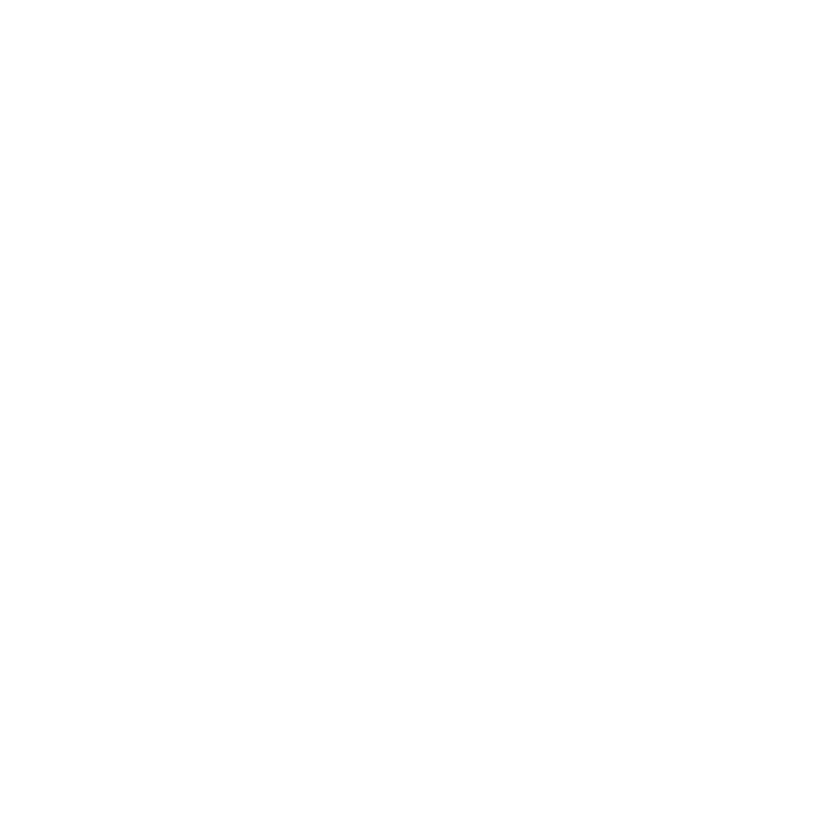

In [106]:
ggplot(data = plotdf, aes(x = bin_ID, y = per, fill = factor(cata))) + 
  geom_bar(stat = "identity", width = 2) + scale_fill_manual(values = c("black", "yellow", "dodgerblue2", "white"))

In [ ]:
zoomindf <- head(plotdf, 200)
ggplot(data = zoomindf, aes(x = bin_ID, y = per, fill = factor(cata))) + 
  geom_bar(aes(fill = cata), stat = "identity", width = 2)